In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: '@rpath/libomp.dylib'\n  Referenced from: '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib'\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [ ]:
%pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.6 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install seaborn

In [ ]:
df = pd.read_csv('train.csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria         

In [ ]:
df['ethnicity'].value_counts()


,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [ ]:
df['relation'].value_counts()


,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [ ]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


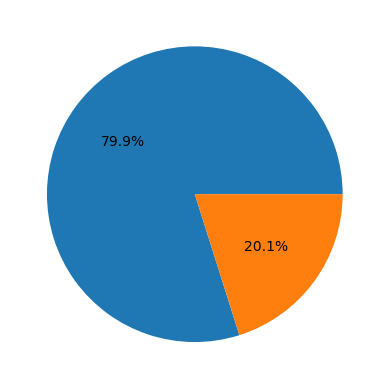

In [ ]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [ ]:
ints = []
objects = []
floats = []

for col in df.columns:
  if pd.api.types.is_integer_dtype(df[col]):
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)

for i in ints:
    print(i)

ID
A1_Score
A2_Score
A3_Score
A4_Score
A5_Score
A6_Score
A7_Score
A8_Score
A9_Score
A10_Score
jaundice
austim
used_app_before
Class/ASD


In [ ]:
ints.remove('ID')
ints.remove('Class/ASD')

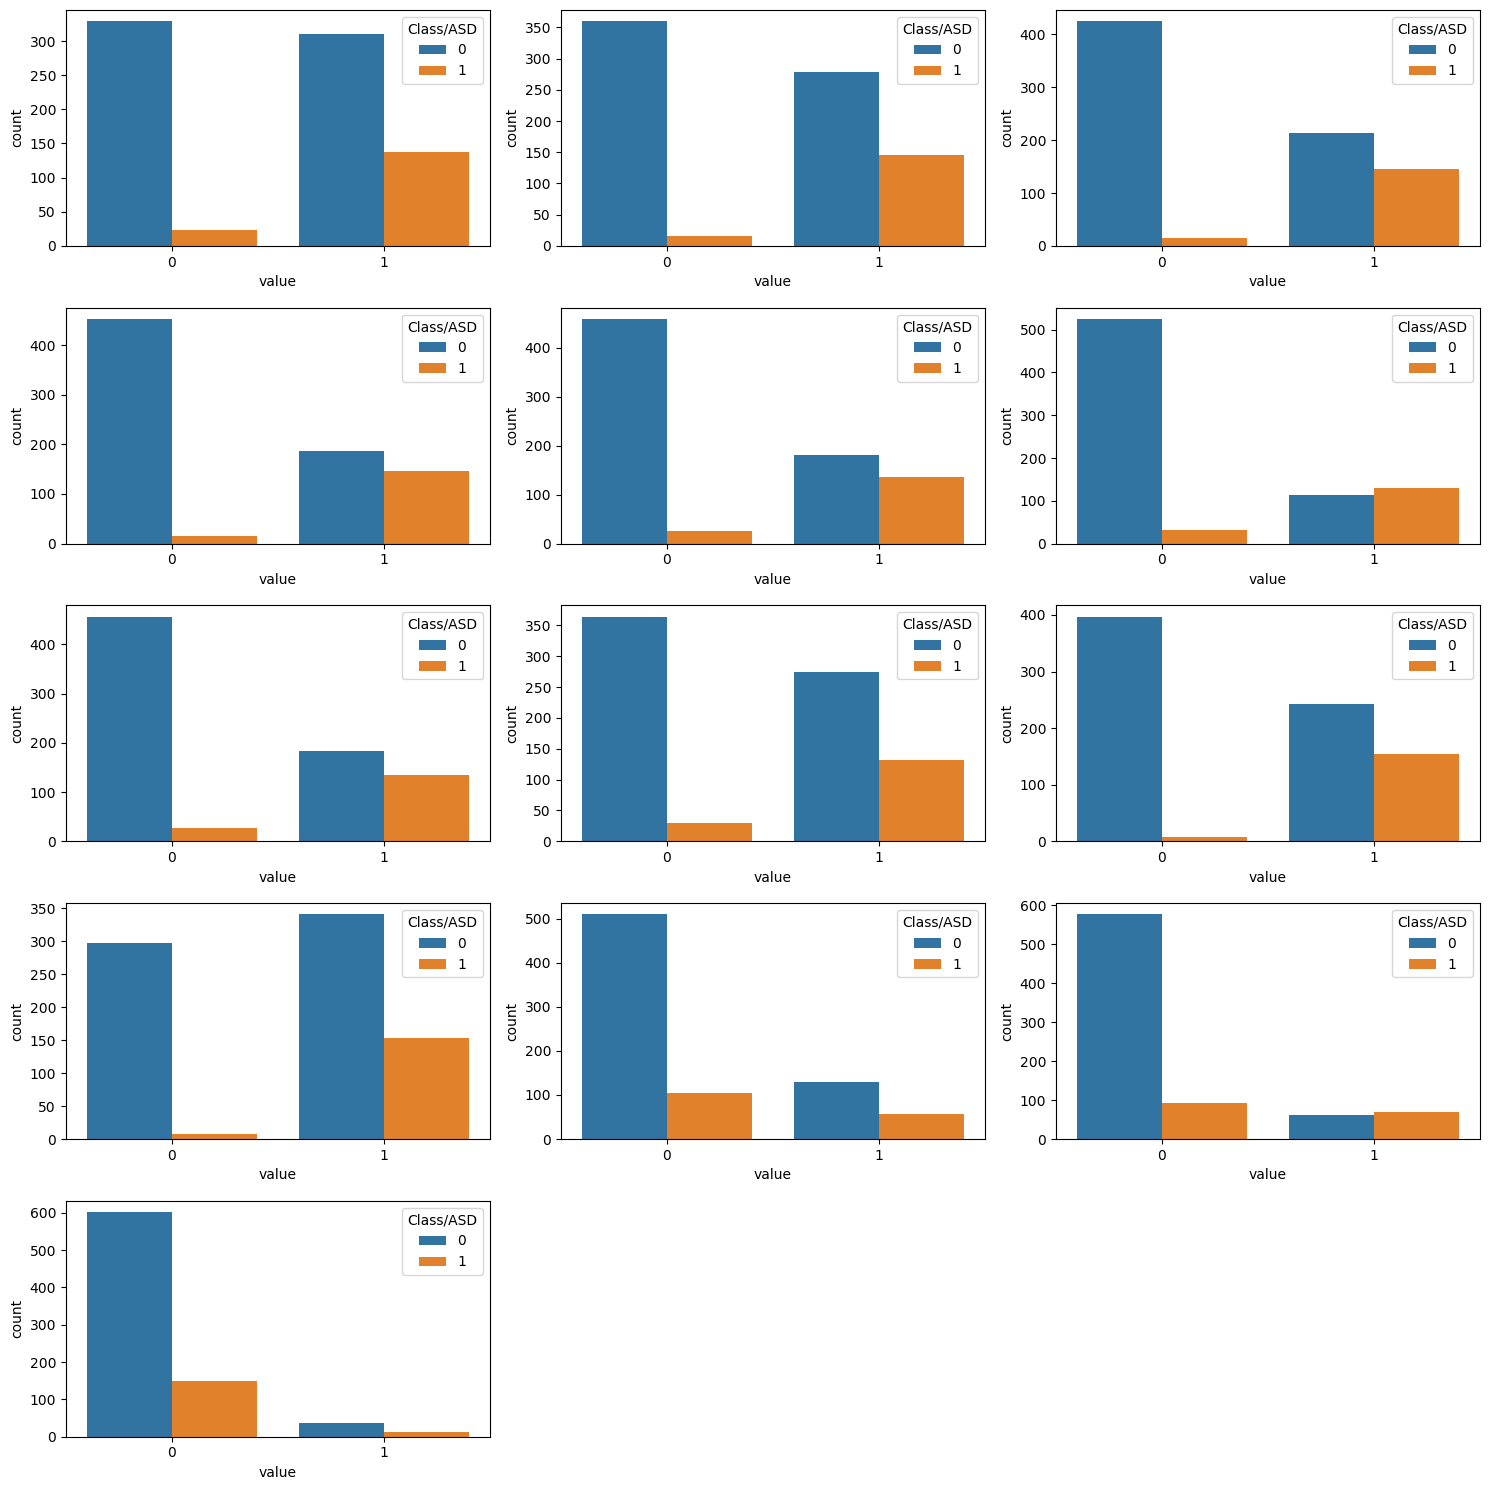

In [ ]:
# Convert the data to long-form using melt
df_melted = df.melt(id_vars=['ID', 'Class/ASD'], value_vars=ints, var_name='col', value_name='value')

plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(5,3,i+1)
  # Use the melted DataFrame and specify x and hue
  sb.countplot(x='value', hue='Class/ASD', data=df_melted[df_melted['col'] == col])

plt.tight_layout()
plt.show()

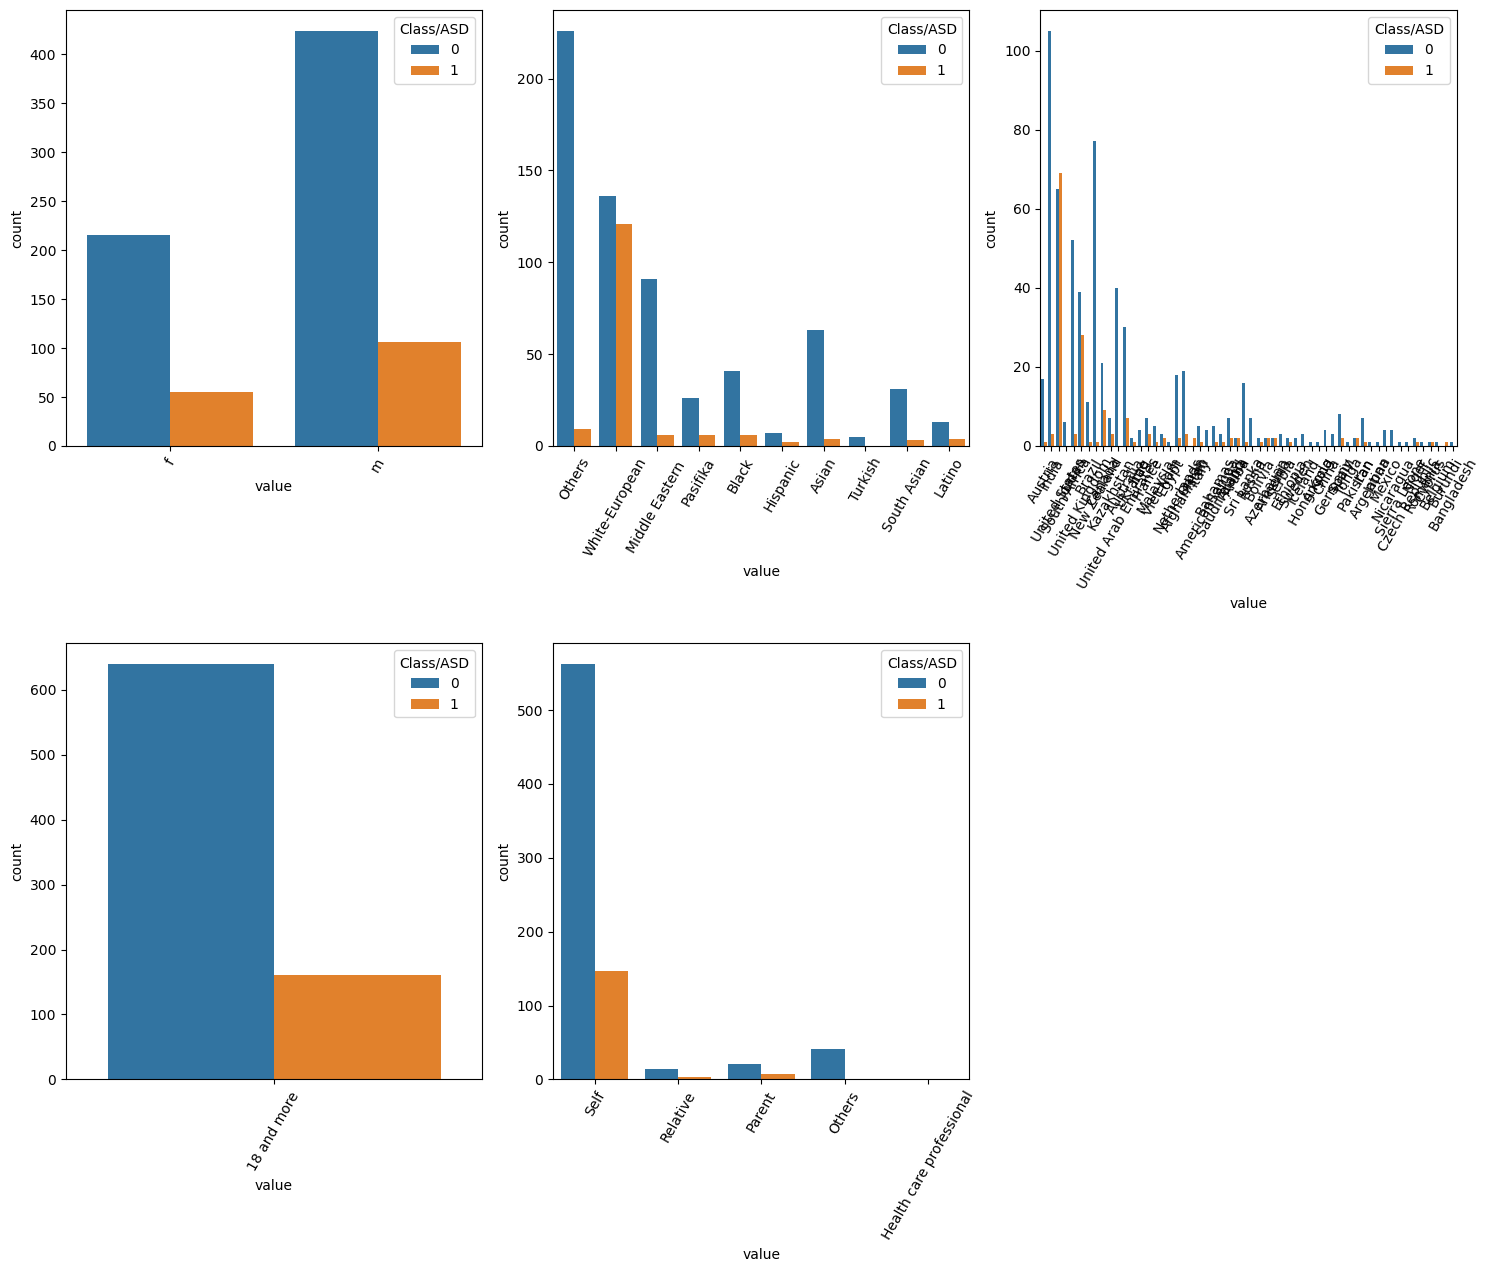

In [ ]:
plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
    plt.subplot(5, 3, i+1)
    # Convert the data to long-form for the specific column
    df_melted = df.melt(id_vars=['Class/ASD'], value_vars=[col], var_name='col', value_name='value')

    # Use the melted DataFrame and specify x and hue
    sb.countplot(x='value', hue='Class/ASD', data=df_melted)
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

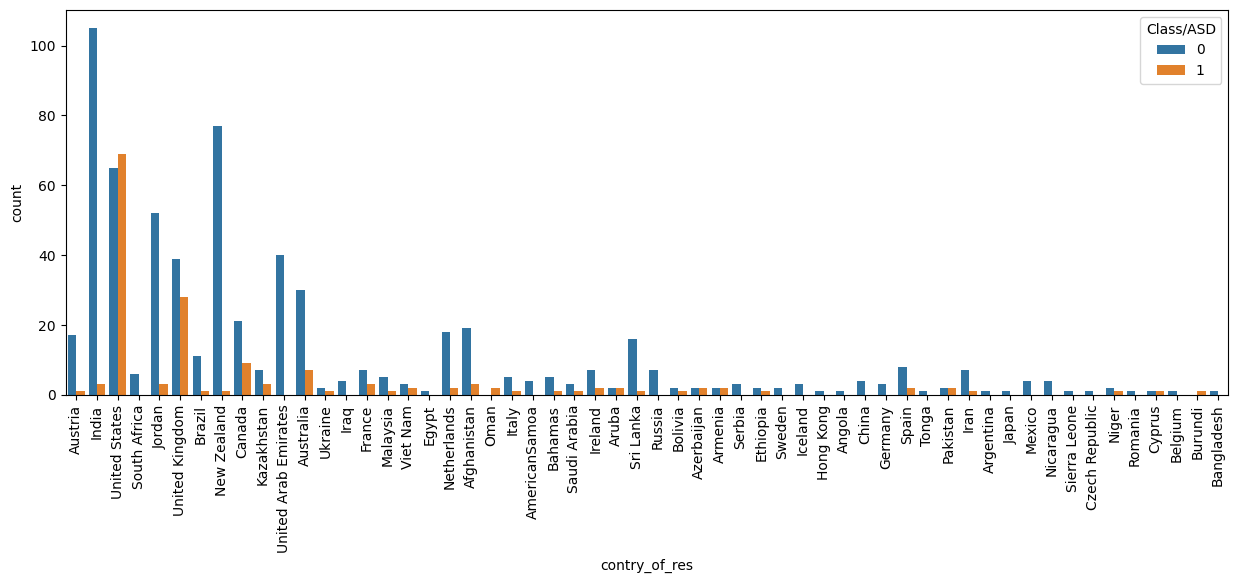

In [ ]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()


<ipython-input-24-5061defceecd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
<ipython-input-24-5061defceecd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])


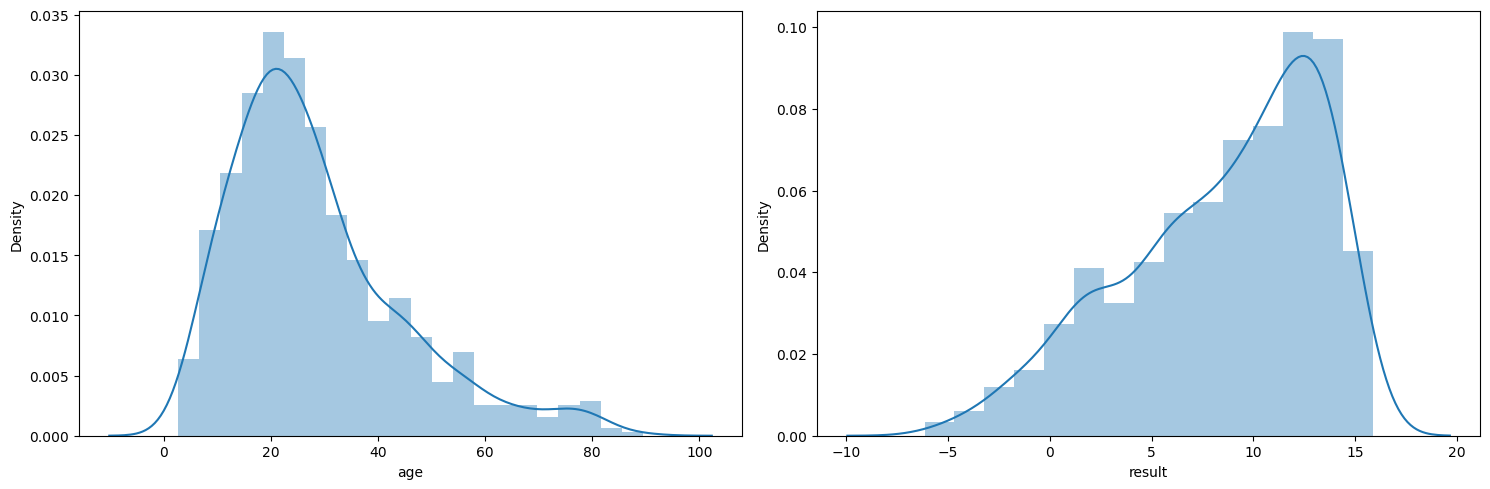

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


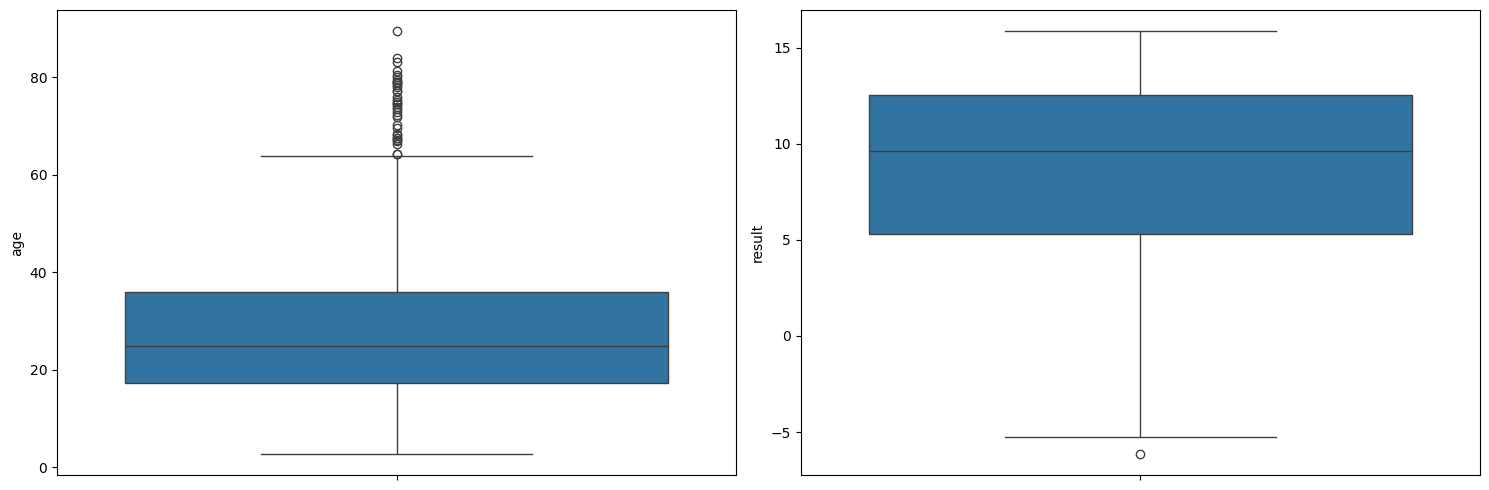

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [ ]:
df = df[df['result']>-5]
df.shape


(798, 22)

In [ ]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)


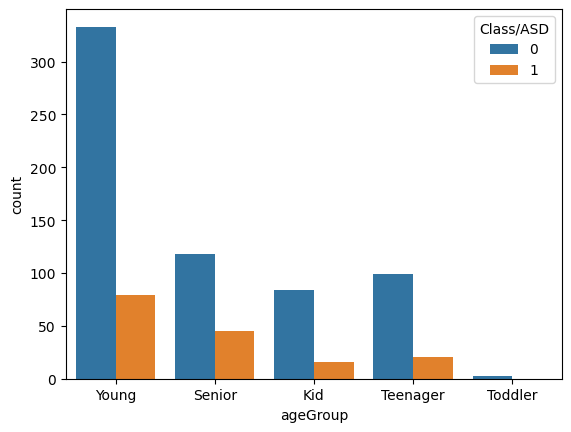

In [ ]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()


In [ ]:
def add_feature(data):

  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)


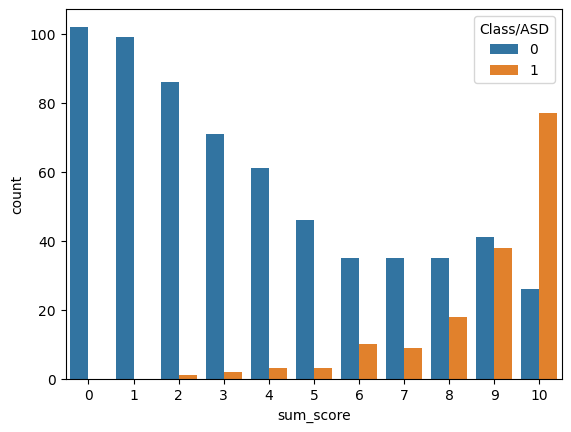

In [ ]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()


In [ ]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))


<ipython-input-32-a70a311fc4af>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['age'])


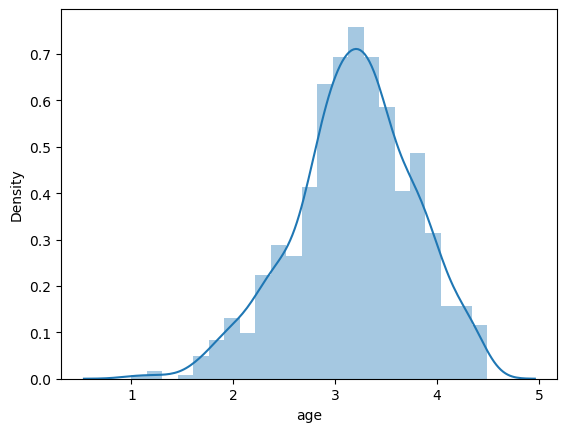

In [ ]:
sb.distplot(df['age'])
plt.show()


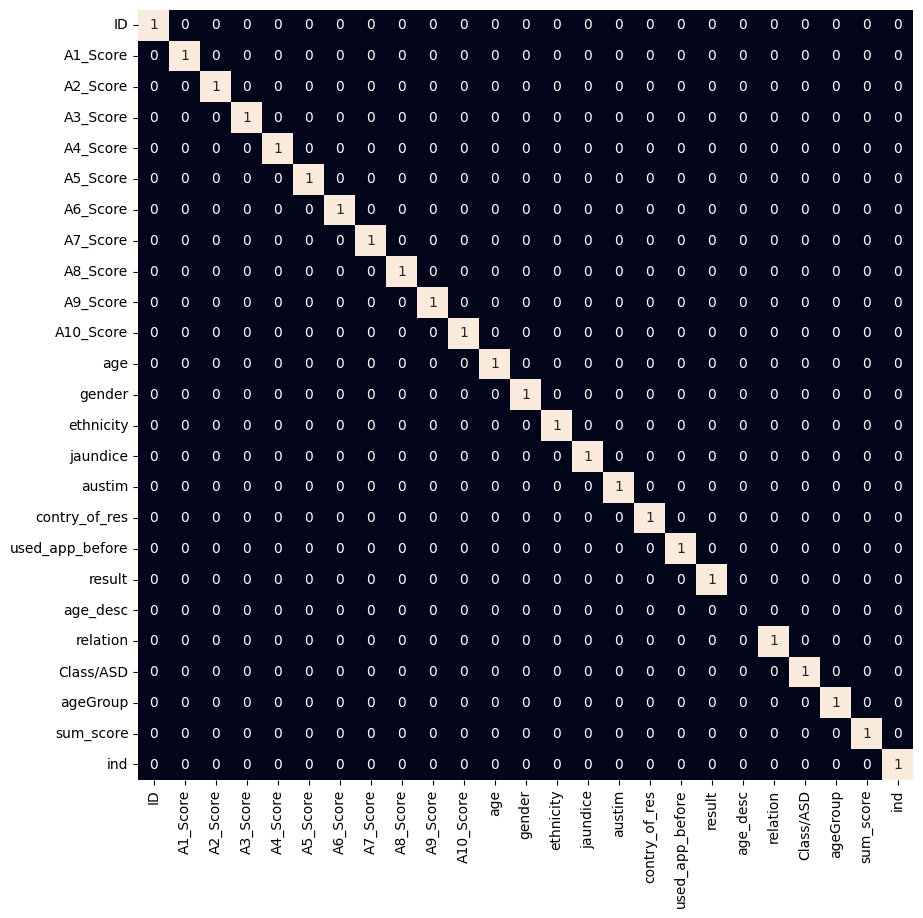

In [ ]:
def encode_labels(data):
    for col in data.columns:

      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [ ]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape


((1026, 20), (1026,))

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()# standardises the features so that each feature contributes equally
X = scaler.fit_transform(X)# fit calculates nesecarry statistics then transform transform them
X_val = scaler.transform(X_val)# did not understand


In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)
    #we will use xgbclasssifierz
  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()


NameError: name 'XGBClassifier' is not defined

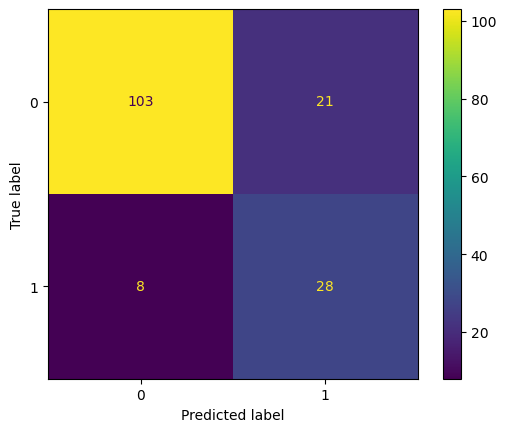

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[1], X_val, Y_val)
plt.show()